In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from citipy import citipy 
import csv
%matplotlib inline

In [2]:
# Read Meteorite_Landings.csv file
meteorite_landings_df = pd.read_csv('Data_Files/Meteorite_Landings.csv')
meteorite_landings_df

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,01/01/1951 12:00:00 AM,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,01/01/1952 12:00:00 AM,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,01/01/1976 12:00:00 AM,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,01/01/1902 12:00:00 AM,-33.16667,-64.95000,"(-33.16667, -64.95)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,01/01/1990 12:00:00 AM,29.03700,17.01850,"(29.037, 17.0185)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,01/01/1999 12:00:00 AM,13.78333,8.96667,"(13.78333, 8.96667)"
45713,Zlin,30410,Valid,H4,3.3,Found,01/01/1939 12:00:00 AM,49.25000,17.66667,"(49.25, 17.66667)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,01/01/2003 12:00:00 AM,49.78917,41.50460,"(49.78917, 41.5046)"


In [3]:
# Modify the dataframe to grab "year" - split with " " space
year_split = meteorite_landings_df["year"].str.split(" ", n = 1, expand = True) 
date_split = year_split[0].str.split("/", n = 2, expand = True) 
meteorite_landings_df["Year"]= date_split[2]

In [4]:
# Delete 'year' column and use 'Year' column for data analyses
del meteorite_landings_df["year"]

In [5]:
# Sort the dataset with Year
sort_meteorite_landings_df = meteorite_landings_df.sort_values(["Year"], ascending=True)
sort_meteorite_landings_df 

,name,id,nametype,recclass,mass (g),fall,reclat,reclong,GeoLocation,Year
704,Nogata,16988,Valid,L6,472.0,Fell,33.72500,130.75000,"(33.725, 130.75)",0860
679,Narni,16914,Valid,Stone-uncl,NaN,Fell,42.51667,12.51667,"(42.51667, 12.51667)",0920
278,Elbogen,7823,Valid,"Iron, IID",107000.0,Fell,50.18333,12.73333,"(50.18333, 12.73333)",1399
856,Rivolta de Bassi,22614,Valid,Stone-uncl,103.3,Fell,45.48333,9.51667,"(45.48333, 9.51667)",1490
283,Ensisheim,10039,Valid,LL6,127000.0,Fell,47.86667,7.35000,"(47.86667, 7.35)",1491
...,...,...,...,...,...,...,...,...,...,...
38207,Valencia,24147,Valid,H5,33500.0,Found,39.00000,-0.03333,"(39.0, -0.03333)",NaN
38231,Villa Regina,53827,Valid,"Iron, IIIAB",5030.0,Found,-39.10000,-67.06667,"(-39.1, -67.06667)",NaN
38308,Wietrzno-Bobrka,24259,Valid,Iron,376.0,Found,49.41667,21.70000,"(49.41667, 21.7)",NaN
38335,Wiltshire,56143,Valid,H5,92750.0,Found,51.14967,-1.81000,"(51.14967, -1.81)",NaN


In [6]:
table_df = sort_meteorite_landings_df[["name", "Year"]]
table_df.head(10)

,name,Year
704,Nogata,0860
679,Narni,0920
278,Elbogen,1399
856,Rivolta de Bassi,1490
283,Ensisheim,1491
1043,Valdinoce,1495
730,Oliva-Gandia,1519
5365,Campo del Cielo,1575
174,Castrovillari,1583
26174,Morito,1600


In [7]:
# Change Year datatypes to integer
sort_meteorite_landings_df["Year"] = pd.to_numeric(sort_meteorite_landings_df["Year"])

In [8]:
clean_meteorite_landings_df = sort_meteorite_landings_df.dropna(how="any")
clean_meteorite_landings_df

,name,id,nametype,recclass,mass (g),fall,reclat,reclong,GeoLocation,Year
704,Nogata,16988,Valid,L6,472.0,Fell,33.72500,130.75000,"(33.725, 130.75)",860.0
278,Elbogen,7823,Valid,"Iron, IID",107000.0,Fell,50.18333,12.73333,"(50.18333, 12.73333)",1399.0
856,Rivolta de Bassi,22614,Valid,Stone-uncl,103.3,Fell,45.48333,9.51667,"(45.48333, 9.51667)",1490.0
283,Ensisheim,10039,Valid,LL6,127000.0,Fell,47.86667,7.35000,"(47.86667, 7.35)",1491.0
5365,Campo del Cielo,5247,Valid,"Iron, IAB-MG",50000000.0,Found,-27.46667,-60.58333,"(-27.46667, -60.58333)",1575.0
...,...,...,...,...,...,...,...,...,...,...
30775,Northwest Africa 7856,57421,Valid,LL6,517.0,Found,0.00000,0.00000,"(0.0, 0.0)",2013.0
30774,Northwest Africa 7855,57420,Valid,H4,916.0,Found,0.00000,0.00000,"(0.0, 0.0)",2013.0
30762,Northwest Africa 7812,57258,Valid,Angrite,46.2,Found,0.00000,0.00000,"(0.0, 0.0)",2013.0
30730,Northwest Africa 7755,57166,Valid,Martian (shergottite),30.0,Found,0.00000,0.00000,"(0.0, 0.0)",2013.0


In [ ]:
# Set up bins for Years
#year_bins = [0, 1899.999, 1999.999, 2020]
#group_names = ["<1900", "1900-2000", "2000-2020"]

In [ ]:
# Add a new column named Year Ramge amd binnning based off the range
#clean_meteorite_landings_df["Year Range"] = pd.cut(clean_meteorite_landings_df["Year"], year_bins, labels=group_names)
#del clean_meteorite_landings_df["Year"]
#clean_meteorite_landings_df

In [9]:
# Delete 0 geocodes from the dataframe
clean_geocode_df= clean_meteorite_landings_df[clean_meteorite_landings_df['reclat'] != 0]
clean_geocode_df["Year"] = round(clean_geocode_df["Year"],0)
clean_geocode_df

/Users/ykajita/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,name,id,nametype,recclass,mass (g),fall,reclat,reclong,GeoLocation,Year
704,Nogata,16988,Valid,L6,472.0,Fell,33.72500,130.75000,"(33.725, 130.75)",860.0
278,Elbogen,7823,Valid,"Iron, IID",107000.0,Fell,50.18333,12.73333,"(50.18333, 12.73333)",1399.0
856,Rivolta de Bassi,22614,Valid,Stone-uncl,103.3,Fell,45.48333,9.51667,"(45.48333, 9.51667)",1490.0
283,Ensisheim,10039,Valid,LL6,127000.0,Fell,47.86667,7.35000,"(47.86667, 7.35)",1491.0
5365,Campo del Cielo,5247,Valid,"Iron, IAB-MG",50000000.0,Found,-27.46667,-60.58333,"(-27.46667, -60.58333)",1575.0
...,...,...,...,...,...,...,...,...,...,...
37734,Stewart Valley 012,55528,Valid,H6,130.0,Found,36.23500,-116.18358,"(36.235, -116.18358)",2012.0
36405,Rosamond,57434,Valid,LL3,11.1,Found,34.82793,-118.14640,"(34.82793, -118.1464)",2012.0
31062,Österplana 049,56148,Relict,Relict OC,0.0,Found,58.58333,13.43333,"(58.58333, 13.43333)",2012.0
30517,Northwest Africa 7496,56314,Valid,Eucrite-pmict,788.4,Found,22.94781,-13.38527,"(22.94781, -13.38527)",2012.0


### Obtain City and Country Name for Each GeoData

In [10]:
# Test CitiPy to obtain city and country
cities_name = []
countrycode = []

for i in range (0, len(clean_geocode_df['reclat'])):
    lat=clean_geocode_df.iloc[i]['reclat']
    long=clean_geocode_df.iloc[i]['reclong']
    city = citipy.nearest_city(lat, long)
    name=city.city_name
    cities_name.append(name)
    country=city.country_code
    countrycode.append(country)

clean_geocode_df['City']=cities_name
clean_geocode_df['Country']=countrycode
clean_geocode_df.head(10)     

/Users/ykajita/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/ykajita/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,name,id,nametype,recclass,mass (g),fall,reclat,reclong,GeoLocation,Year,City,Country
704,Nogata,16988,Valid,L6,472.0,Fell,33.72500,130.75000,"(33.725, 130.75)",860.0,nogata,jp
278,Elbogen,7823,Valid,"Iron, IID",107000.0,Fell,50.18333,12.73333,"(50.18333, 12.73333)",1399.0,loket,cz
856,Rivolta de Bassi,22614,Valid,Stone-uncl,103.3,Fell,45.48333,9.51667,"(45.48333, 9.51667)",1490.0,treviglio,it
283,Ensisheim,10039,Valid,LL6,127000.0,Fell,47.86667,7.35000,"(47.86667, 7.35)",1491.0,wittenheim,fr
5365,Campo del Cielo,5247,Valid,"Iron, IAB-MG",50000000.0,Found,-27.46667,-60.58333,"(-27.46667, -60.58333)",1575.0,presidencia roque saenz pena,ar
174,Castrovillari,5295,Valid,Stone-uncl,15000.0,Fell,39.80000,16.20000,"(39.8, 16.2)",1583.0,castrovillari,it
26174,Morito,16745,Valid,"Iron, IIIAB",10100000.0,Found,27.05000,-105.43333,"(27.05, -105.43333)",1600.0,valle de allende,mx
410,Jalandhar,12069,Valid,Iron,1967.0,Fell,31.00000,75.00000,"(31.0, 75.0)",1621.0,makhu,in
960,Stretchleigh,23732,Valid,Stone-uncl,10400.0,Fell,50.38333,-3.95000,"(50.38333, -3.95)",1623.0,ivybridge,gb
369,Hatford,11855,Valid,Stone-uncl,29000.0,Fell,51.65000,-1.51667,"(51.65, -1.51667)",1628.0,witney,gb


In [12]:
table_2 = clean_geocode_df[["name", "mass (g)", "City", "Country", "Year"]]
table_2.head(10)

,name,mass (g),City,Country,Year
704,Nogata,472.0,nogata,jp,860.0
278,Elbogen,107000.0,loket,cz,1399.0
856,Rivolta de Bassi,103.3,treviglio,it,1490.0
283,Ensisheim,127000.0,wittenheim,fr,1491.0
5365,Campo del Cielo,50000000.0,presidencia roque saenz pena,ar,1575.0
174,Castrovillari,15000.0,castrovillari,it,1583.0
26174,Morito,10100000.0,valle de allende,mx,1600.0
410,Jalandhar,1967.0,makhu,in,1621.0
960,Stretchleigh,10400.0,ivybridge,gb,1623.0
369,Hatford,29000.0,witney,gb,1628.0


In [13]:
max_df = clean_geocode_df.loc[clean_geocode_df["mass (g)"] == 60000000.0, :]
max_df

,name,id,nametype,recclass,mass (g),fall,reclat,reclong,GeoLocation,Year,City,Country
16392,Hoba,11890,Valid,"Iron, IVB",60000000.0,Found,-19.58333,17.91667,"(-19.58333, 17.91667)",1920.0,grootfontein,na


In [18]:
sort_meteorite_mass_df = clean_geocode_df.sort_values(["mass (g)"], ascending=False)
sort_meteorite_mass_df[["name", "mass (g)", "City", "Country", "Year"]].head(10)

,name,mass (g),City,Country,Year
16392,Hoba,60000000.0,grootfontein,na,1920.0
5373,Cape York,58200000.0,narsaq,gl,1818.0
5365,Campo del Cielo,50000000.0,presidencia roque saenz pena,ar,1575.0
5370,Canyon Diablo,30000000.0,winslow,us,1891.0
3455,Armanty,28000000.0,altay,cn,1898.0
12613,Gibeon,26000000.0,mariental,na,1836.0
5468,Chupaderos,24300000.0,valle de allende,mx,1852.0
26297,Mundrabilla,24000000.0,esperance,au,1911.0
920,Sikhote-Alin,23000000.0,novopokrovka,ru,1947.0
5016,Bacubirito,22000000.0,sinaloa,mx,1863.0


In [19]:
country_geo_count_df = clean_geocode_df.groupby("Country")["name"].count()

In [20]:
country_geo_count_df.to_csv("country_geo_count.csv", encoding="utf-8", index=True)

In [21]:
country_geo_count_df = pd.read_csv("Data_Files/country_geo_count.csv")

In [22]:
country_geo_count_df.count()

Country    120
name       120
dtype: int64

In [23]:
# Select countries if they had more than 100 meteorites
major_country_geo_count_df = country_geo_count_df.loc[country_geo_count_df["name"] > 100, :]
major_country_geo_count_df.count()

Country    14
name       14
dtype: int64

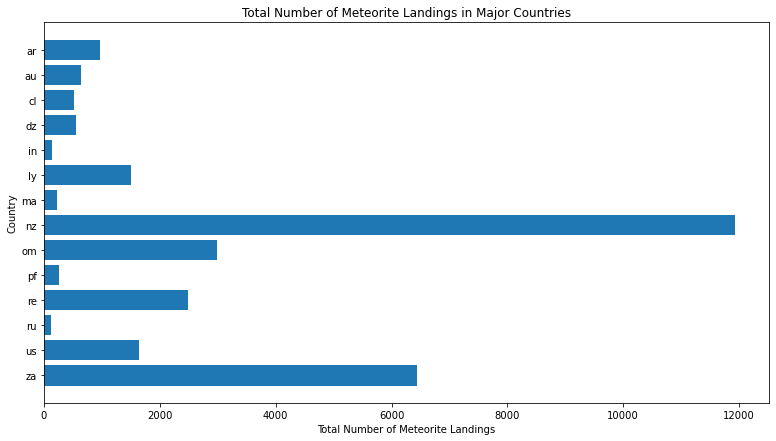

In [25]:
x_axis = major_country_geo_count_df["Country"]
y_axis = major_country_geo_count_df["name"]
plt.figure(figsize=(13,7))
plt.barh(x_axis, y_axis)
plt.title("Total Number of Meteorite Landings in Major Countries")
plt.xlabel("Total Number of Meteorite Landings")
plt.ylabel("Country")
plt.gca().invert_yaxis()
plt.savefig("Meteorites_Countries.png")
plt.show()

In [ ]:
# Pie Chart
pie = plt.pie(major_country_geo_count_df["name"], shadow=True, autopct='%1.1f%%')
plt.axis("equal")
labels=major_country_geo_count_df["Country"]
plt.legend(pie[0],labels, bbox_to_anchor=(1,0), loc="lower right", 
                          bbox_transform=plt.gcf().transFigure)

plt.show()

In [ ]:
# Find Out Top 10 Largest Meteorites on Earth
sort_mass_df = clean_geocode_df.sort_values(by="mass (g)", ascending=False)
sort_mass_df.head(10)

In [ ]:
import gmaps

# Google developer API key
from config import gkey

# Access maps with unique API key
gmaps.configure(api_key=gkey)

In [ ]:
# Store latitude and longitude in locations
locations = sort_mass_df[["reclat", "reclong"]].head(10)
# Plot as a Terrain map
fig = gmaps.figure(zoom_level = 2, center = [0,180])

In [ ]:
# Assign the marker layer to a variable
markers = gmaps.marker_layer(locations)
# Add the layer to the map
fig.add_layer(markers)
fig


In [ ]:
from IPython.display import Image
Image("Biggest_Mass10.png")

In [ ]:
# Find Out Top 10 Earliest Found Meteorites Landings on Earth
sort_year_df = clean_geocode_df.sort_values(by="Year", ascending=True)
sort_year_df.head(10)

In [ ]:
# Store latitude and longitude in locations
locations = sort_year_df[["reclat", "reclong"]].head(10)
# Plot as a Terrain map
fig_2 = gmaps.figure(zoom_level = 2, center = [0,180])

In [ ]:
# Assign the marker layer to a variable
markers = gmaps.marker_layer(locations)
# Add the layer to the map
fig_2.add_layer(markers)
fig_2

In [ ]:
Image("oldest_meteorites.png")